# Pandas 数据分析
---

#### 课程内容

1. DataFrame 分组操作
2. DataFrame 合并操作
3. DataFrame 层次化索引

---
### 1. DataFrame 分组操作

#### 1.1 GroupBy 对象

In [1]:
import numpy as np
import pandas as pd

In [2]:
stock_info = pd.DataFrame(
                  [['600804', '鹏博士', 30.87, '电信运营', 249, '上证'],
                   ['002467', '二六三', 71.47, '电信运营', 48.3, '深证'],
                   ['002093', '国脉科技', 70.99, '电信运营', 90.5, '深证'],
                   ['601601', '中国太保', 24.74, '保险', 2500, '上证'],
                   ['600050', '中国联通', 120.12, '电信运营', 1473, '上证'],
                   ['601318', '中国平安', 15.80, '保险', 8280, '上证'],
                   ['601528', '中国人寿', 24.44, '保险', 6441, '上证'],
                   ['300383', '光环新网', 44.01, '电信运营', 180, '创业板'],
                   ['601336', '新华保险', 27.82, '保险', 1250, '上证'],
                   ['600291', '西水股份', 8.64, '保险', 257, '上证'],
                   ['000627', '天茂集团', 37.77, '保险', 116, '上证']
                  ],
                  columns=['code', 'name', 'pe', 'industry', 'tradable_value','market'],
                  )

In [3]:
stock_info                           

,code,name,pe,industry,tradable_value,market
0,600804,鹏博士,30.87,电信运营,249.0,上证
1,002467,二六三,71.47,电信运营,48.3,深证
2,002093,国脉科技,70.99,电信运营,90.5,深证
3,601601,中国太保,24.74,保险,2500.0,上证
4,600050,中国联通,120.12,电信运营,1473.0,上证
5,601318,中国平安,15.80,保险,8280.0,上证
6,601528,中国人寿,24.44,保险,6441.0,上证
7,300383,光环新网,44.01,电信运营,180.0,创业板
8,601336,新华保险,27.82,保险,1250.0,上证
9,600291,西水股份,8.64,保险,257.0,上证


In [4]:
grouped = stock_info.groupby('industry')           # 对行业进行分组

In [5]:
type(grouped)                                      # groupby对象

pandas.core.groupby.generic.DataFrameGroupBy

In [6]:
grouped.size()                                     # grouped.size()每组元素数量

industry
保险      6
电信运营    5
dtype: int64

#### 1.2 选择数据

In [7]:
grouped.get_group('保险')               

,code,name,pe,industry,tradable_value,market
3,601601,中国太保,24.74,保险,2500.0,上证
5,601318,中国平安,15.80,保险,8280.0,上证
6,601528,中国人寿,24.44,保险,6441.0,上证
8,601336,新华保险,27.82,保险,1250.0,上证
9,600291,西水股份,8.64,保险,257.0,上证
10,000627,天茂集团,37.77,保险,116.0,上证


In [8]:
grouped.get_group('电信运营')  

,code,name,pe,industry,tradable_value,market
0,600804,鹏博士,30.87,电信运营,249.0,上证
1,002467,二六三,71.47,电信运营,48.3,深证
2,002093,国脉科技,70.99,电信运营,90.5,深证
4,600050,中国联通,120.12,电信运营,1473.0,上证
7,300383,光环新网,44.01,电信运营,180.0,创业板


#### 1.3 聚合运算

In [ ]:
grouped.describe()

In [ ]:
grouped.describe().T

In [17]:
grouped.max()                                        # 对 name 和 market 这种不需要计算最大值的列也返回了结果

,code,name,pe,tradable_value,market
industry,,,,,
保险,601601,西水股份,37.77,8280.0,上证
电信运营,600804,鹏博士,120.12,1473.0,深证


In [9]:
grouped[['pe','tradable_value']].max()              # 可通过索引解决

,pe,tradable_value
industry,,
保险,37.77,8280.0
电信运营,120.12,1473.0


In [10]:
grouped.max()[['pe', 'tradable_value']]             # 也聚合运算后通过索引取出有效数据，此种方法本质上是对DataFrame的多列索引

,pe,tradable_value
industry,,
保险,37.77,8280.0
电信运营,120.12,1473.0


In [11]:
type(grouped.max())                                 # groupby 对象进行聚合操作之后返回 DataFrame

pandas.core.frame.DataFrame

In [12]:
grouped[['pe','tradable_value']].agg([np.max, np.min])    # 可以通过传入函数的方式对分组进行聚合处理

pe        tradable_value       
            amax   amin           amax   amin
industry                                     
保险         37.77   8.64         8280.0  116.0
电信运营      120.12  30.87         1473.0   48.3

In [13]:
grouped[['pe','tradable_value']].agg({'pe':np.min, 'tradable_value':np.max})
                                                         # 也可以对不同列应用不同的聚合处理函数
                                                         # 是要以字典的形式；

,pe,tradable_value
industry,,
保险,8.64,8280.0
电信运营,30.87,1473.0


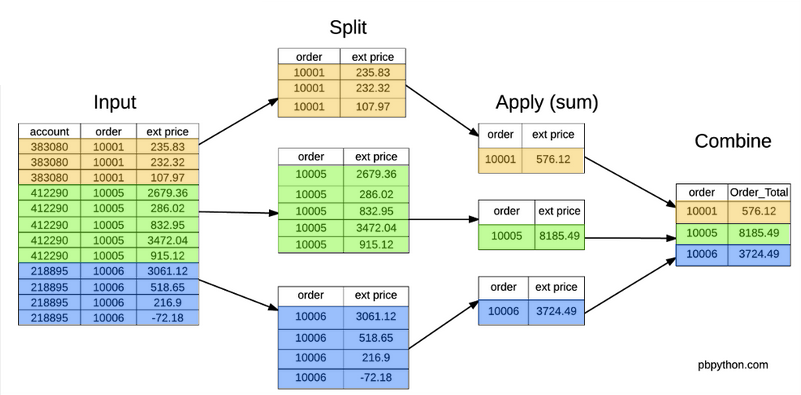

#### 1.4 多重分组

In [ ]:
stock_info

In [ ]:
multi_grouped = stock_info.groupby(['market', 'industry'])

In [ ]:
multi_grouped.size()

In [ ]:
multi_grouped.get_group(('上证', '保险'))    # 获取某个分组内成员的数据

---
### 2. DataFrame 合并操作

#### 2.1 Concat

#### 2.1.1 concat - 纵向拼接

使用 `pd.concat()` 函数可以将多个 DataFrame 进行拼接，默认是纵向拼接。

常用参数：

`axis=1` 表示横向拼接；

`ignore_index=True` 表示重置索引。

In [ ]:
df1 = pd.DataFrame([['a', np.nan], ['b', 5], ['c', 8]], columns=['key', 'value'],index=['x','z','y'])
                                                     # 创建DataFrame df1
df1

In [ ]:
df2 = pd.DataFrame([['a', 100], ['b', 10], ['c', 100]], columns=['key', 'value'],index=['x','z','y'])
                                                     # 创建DataFrame  df2
df2

In [ ]:
pd.concat([df1, df2], join='inner')                   # 默认纵向拼接

#### 2.1.2 concat - 横向拼接

`pd.concat()` 函数参数 `axis=1` 时表示横向拼接。

In [ ]:
pd.concat([df1, df2], axis=1)  

In [ ]:
df3 = df2.reset_index()
df3

In [ ]:
pd.concat([df1, df3], axis=1)  

#### 2.1.3 concat - 重置索引

`pd.concat()` 函数参数 `ignore_index=True` 时表示重置索引。

In [ ]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], ignore_index=True)   

#### 2.2 Join

#### 2.2.1 join - left 合并

`DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)` 默认按左表索引对齐合并。

常用参数：

other：可以是 DataFrame、Series、list of DataFrames 等；

how：控制合并方法；

lsuffix/rsuffix：当两个表格有相同列时，直接合并会报错，需使用该参数区分两列。

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30]},index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5]},index=list('adg'))
df2

In [ ]:
df1.join(df2)      # 默认按左表index进行合并

#### 2.2.2 join - how 参数

In [ ]:
print(df1)
print(df2)

In [ ]:
df1.join(df2, how='right')

In [ ]:
df1.join(df2, how='outer')

In [ ]:
df1.join(df2, how='inner')

#### 2.2.3 join - 含相同列

当两个表格有相同列时，直接合并会报错，需使用 `lsuffix/rsuffix` 参数区分两列。

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30],
                    'ROE':[0.12,0.25,0.13,0.23]},index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5],
                    'ROE':[0.12,0.23,0.13]},index=list('adg'))
df2

In [ ]:
df1.join(df2, rsuffix='_r')

In [ ]:
df1.join(df2, lsuffix='_l')

#### 2.3 Merge

#### 2.3.1 merge - 重复列合并

使用 `pd.merge()` 函数 或 `DataFrame.merge()` 方法可以方便地合并含有相同列的两个 DataFrame。

使用 merge 方法合并，默认是 inner 方式，并且默认忽视索引。

常用参数：

on：控制按哪一列合并；

how：控制合并方式；

left_index/right_index：按索引合并；

left_on/right_on：当两个 DataFrame 两列意义相同但列名不同时，可以使用该参数按该列合并。

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30],
                    'ROE':[0.12,0.25,0.13,0.23]}, index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5],
                    'ROE':[0.12,0.23,0.13]}, index=list('adg'))
df2

In [ ]:
pd.merge(df1,df2)          # 可以使用 pd.merge() 函数

In [ ]:
df1.merge(df2)            # 也可以使用 DataFrame.merge() 方法

#### 2.3.2 merge - on 参数

In [ ]:
df1 = pd.DataFrame({'PB':[10,20,25,30],
                    'ROE':[0.12,0.25,0.13,0.23]}, index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5],
                    'ROE':[0.12,0.23,0.13]}, index=list('adg'))
df2

In [ ]:
pd.merge(df1, df2, on='ROE')     # 通过参数 on 可以控制按某列合并

#### 2.3.3 merge - how 参数

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30],
                    'ROE':[0.12,0.25,0.13,0.23]}, index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5],
                    'ROE':[0.12,0.23,0.13]}, index=list('adg'))
df2

In [ ]:
pd.merge(df1, df2, how='left')

In [ ]:
pd.merge(df1, df2, how='right')

In [ ]:
pd.merge(df1, df2, how='outer')

#### 2.3.4 merge - 按索引合并

当 `merge()` 方法的 `left_index/right_index` 参数为 True 时，按索引合并。

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30]},index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5]},index=list('adg'))
df2

In [ ]:
df1.join(df2, how='inner')    

In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True)   # 和 join 合并效果相同

#### 2.3.5 merge - 相同列不同列名

当两个 DataFrame 两列意义相同但列名不同时，可以使用 `left_on/right_on` 参数按指定列合并。

In [ ]:
df1 = pd.DataFrame({'PE':[10,20,25,30],
                    'roe':[0.12,0.25,0.13,0.23]}, index=list('abcd'))
df1

In [ ]:
df2 = pd.DataFrame({'PB':[2.5,3.2,2.5],
                    'ROE':[0.12,0.23,0.13]}, index=list('adg'))
df2

In [ ]:
pd.merge(df1,df2,left_on='roe',right_on='ROE')

---
### 3. DataFrame 层次化索引

#### 3.1 构建层次化索引

使用嵌套列表可以构建层次化索引。

In [15]:
s = pd.Series(np.random.randn(5),index=[['a','a','b','b','b'],[1,2,1,2,3]])
s

a  1    0.118300
   2   -0.184343
b  1   -0.513483
   2    0.976805
   3    1.866211
dtype: float64

#### 3.2 使用层次化索引

In [16]:
s['a',1]

0.11830012004766437

#### 3.3 平面化展示

In [ ]:
s.unstack()

#### 3.4 聚合运算

In [ ]:
s.sum(level=0)

In [ ]:
s.sum(level=1)

层次化索引实例

In [ ]:
import tushare as ts
pro = ts.pro_api()

In [ ]:
df = pro.daily(ts_code='000001.SZ,000002.SZ,600000.SH', start_date='20180701', end_date='20180718')     # 获取三只股票的日线数据
df.sort_values(['ts_code','trade_date'],inplace=True)
df

In [ ]:
df.set_index(['ts_code','trade_date'],inplace=True)
df

In [ ]:
df.loc['000001.SZ','20180702']['open']

In [ ]:
df['close'].unstack().T

声明：本资料仅限内部研究使用，切勿外传。